<a href="https://colab.research.google.com/github/qrosakee/data-analysis-ecommerce-nlp/blob/main/ecommerce_nlp_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import pandas as pd
import re

import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk import ToktokTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
stops = stopwords.words("english")

In [ ]:
data = pd.read_csv("drive/MyDrive/data1/ecommerceDataset.csv")

In [ ]:
data.shape

(50424, 2)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50424 entries, 0 to 50423
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   50424 non-null  object
 1   Text    50423 non-null  object
dtypes: object(2)
memory usage: 788.0+ KB


In [ ]:
data.describe()

,Label,Text
count,50424,50423
unique,4,27801
top,Household,Think & Grow Rich About the Author NAPOLEON HI...
freq,19312,30


In [ ]:
data.sample(5)

,Label,Text
13790,Household,HOKIPO Magic Sticker Series Self Adhesive Bath...
976,Electronics,Suroskie Wireless 3.5Mm Jack Car Bluetooth Mus...
10256,Household,Trady Paint Zoom Electric Paint Zoom Ultimate ...
11004,Books,Twenty Love Poems: And A Song Of Despair Revie...
46509,Electronics,Zorbes V6 BT Bluetooth Motorcycle Motorbike He...


In [ ]:
data.Label.value_counts()

Household                 19312
Books                     11820
Electronics               10621
Clothing & Accessories     8671
Name: Label, dtype: int64

In [ ]:
labels = data.Label.unique()
labels

array(['Household', 'Clothing & Accessories', 'Electronics', 'Books'],
      dtype=object)

In [ ]:
type(data.Text[0])

str

In [ ]:
data.head(5)

,Label,Text
0,Household,Styleys Wrought Iron Coat Rack Hanger Creative...
1,Household,Cuisinart CCO-50BKN Deluxe Electric Can Opener...
2,Household,Anchor Penta 6 Amp 1 -Way Switch (White) - Pac...
3,Clothing & Accessories,"Proline Men's Track Jacket Proline Woven, 100%..."
4,Household,Chef's Garage 2 Slot Edge Grip Kitchen Knife S...


Todo:

remove non-ascii characters

In [ ]:
def remove_special(s):
  return re.sub(r"[^a-zA-z\s]", "", s)

remove_special("helllo .")

'helllo '

In [ ]:
data = data.dropna()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50423 entries, 0 to 50423
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   50423 non-null  object
 1   Text    50423 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


In [ ]:
data["Text"] = data["Text"].apply(remove_special)

In [ ]:
data[data.Label == labels[2]]

,Label,Text
7,Electronics,Sony Alpha AL MP Digital SLR Camera Black mm ...
8,Electronics,xcluma Antenna for GSM FCT Device GSM FCT Cabl...
11,Electronics,WD My Passport TB Portable External Hard Drive...
12,Electronics,DLink DCSPLH Mini HD WiFi Camera Works with Al...
17,Electronics,TopMate C inch Gaming Laptop Cooler Five Quit...
...,...,...
50393,Electronics,Seagate TB Backup Plus Slim Black USB Externa...
50395,Electronics,TPLINK GHz Mbps High Power Outdoor Wireless A...
50397,Electronics,MSI GF Intel Core i th Gen inch Gaming FHD Thi...
50399,Electronics,Godox Ving V II TTL LiIon Flash Kit for Canon...


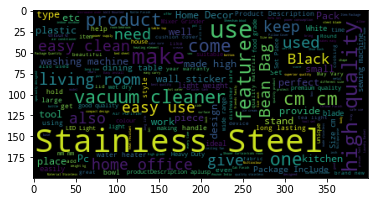

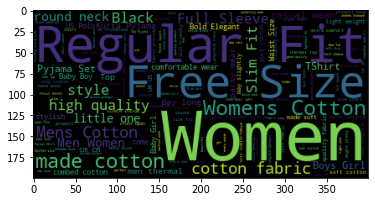

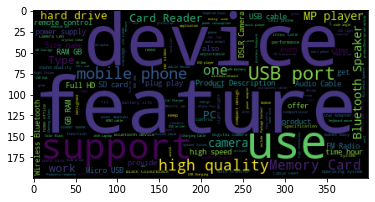

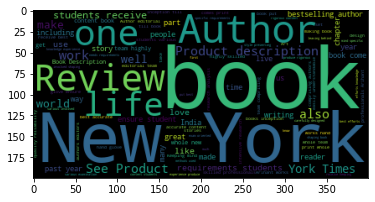

In [ ]:
wc = WordCloud(stopwords = stops)

for x in labels:
  subData = ' '.join(data[data.Label == x].Text)
  cloud = wc.generate(subData)
  plt.imshow(cloud)
  plt.show()

In [ ]:
data["Text"] = data["Text"].apply(lambda x: x.lower())

In [ ]:
tok = ToktokTokenizer()
data["Tokens"] = data["Text"].apply(lambda x: tok.tokenize(x))

In [ ]:
def remove_stopwords(ar):
  result = []
  for x in ar:
    if x not in stops:
      result.append(x)
  return result

In [ ]:
data["Tokens"] = data["Tokens"].apply(remove_stopwords)

In [ ]:
lemmatizer = WordNetLemmatizer()

In [ ]:
def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word))
    return new_words

In [ ]:
data["Tokens"] = data["Tokens"].apply(lemmatize_list)

In [ ]:
data["Text"] = data["Tokens"].apply(lambda x: " ".join(x))

In [ ]:
data.drop(columns=["Tokens"]).head(5)

,Label,Text
0,Household,styleys wrought iron coat rack hanger creative...
1,Household,cuisinart ccobkn deluxe electric opener black ...
2,Household,anchor penta amp way switch white pack anchor ...
3,Clothing & Accessories,proline men track jacket proline woven polyest...
4,Household,chef garage slot edge grip kitchen knife sharp...


In [ ]:
cvec = CountVectorizer(max_features=200)
cvec.fit(data.Text)

CountVectorizer(max_features=200)

In [ ]:
tfidf = TfidfVectorizer(max_features=200)
tfidf.fit(data.Text)

TfidfVectorizer(max_features=200)

In [ ]:
train_cvec = cvec.transform(data.Text).toarray()

In [ ]:
train_tfidf = tfidf.transform(data.Text).toarray()

In [ ]:
model = RandomForestClassifier()
model.fit(train_cvec, data.Label)
np.mean(cross_val_score(model, train_cvec, data.Label, cv = 10))

0.9543462596127881

In [ ]:
model_tfidf = RandomForestClassifier()
model_tfidf.fit(train_tfidf, data.Label)
np.mean(cross_val_score(model, train_tfidf, data.Label, cv = 10))

0.9539298132844525

Summary

We were able to make a classifier using a bag of words representation of product descriptions, with a 95% validation score.

For preprocessing, we used stop-words removal, special-character removal, and lemmatization.